In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np

In [3]:
def drawImg(img,title='Image'):
    plt.imshow(img)
    plt.axis("off")
    plt.style.use('seaborn')
    plt.title(title)

In [4]:
img_ = cv2.imread('D:\shinchan.jpg') #BGR
img_ = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img = cv2.resize(img_,(100,100))
img_gray = cv2.cvtColor(img_,cv2.COLOR_BGRA2GRAY)

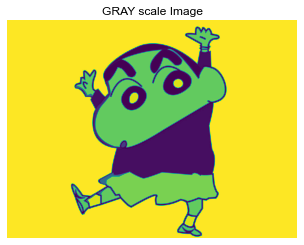

In [5]:
drawImg(img_gray,'GRAY scale Image')

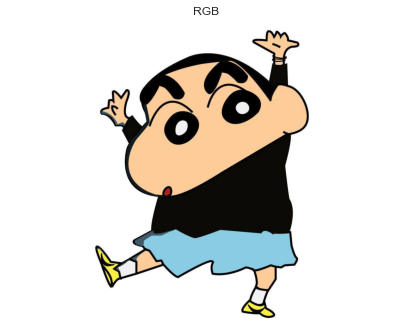

In [6]:
drawImg(img_,'RGB')

In [7]:
def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0]
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                    
                    if new_img[row][col]>255:
                        new_img[row][col] = 255
                    elif new_img[row][col] <0 :
                        new_img[row][col] = 0
                        
    return new_img

In [8]:
blur_filter = np.ones((3,3))/9.0

output1 = convolution(img_gray,blur_filter)

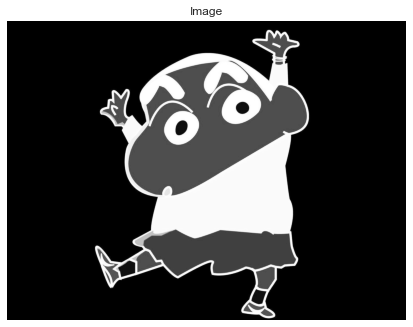

In [9]:
drawImg(output1)

In [10]:
pad_img = np.pad(img,((10,10),(10,10),(0,0)),'constant',constant_values=0)

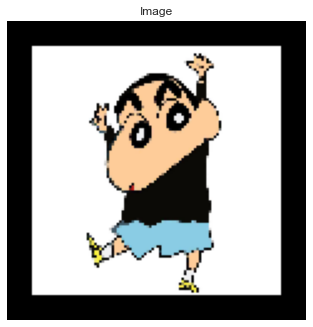

In [11]:
drawImg(pad_img)

In [15]:
X = np.array([[1,0,2,3],
             [4,6,6,8],
             [3,1,1,0],
             [1,2,2,4]])



def Pooling_layer(X,mode="max"):
    stride = 2
    f = 2
    H,W = X.shape
    
    HO = int((H-f)/stride)+1
    WO = int((W-f)/stride)+1
    
    output = np.zeros((WO,HO))
    for r in range(HO):
        for c in range(Wo):
            r_start = r*stride
            r_end = r_start + f
            c_start = c*stride
            c_end = c_start + f
            
            X_slice = X[r_start:r_end,c_start:c_end]
            
            if mode == "max":
                output[r][c] = np.max(X_slice)
            else:
                output[r][c] = np.mean(X_slice)
                
    return output    

### MNIST Fashion Dataset

In [32]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

In [33]:
x = pd.read_csv("D:/fashion-mnist_test.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape,y.shape)

(10000, 784) (10000,)


In [34]:
X_train = X.reshape(-1,28,28,1)
y_train = np_utils.to_categorical(y)

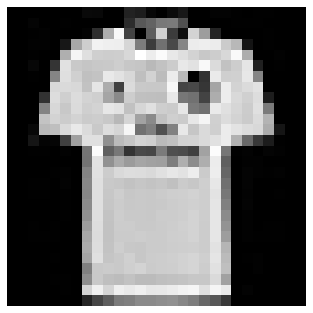

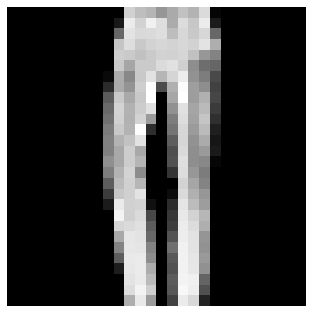

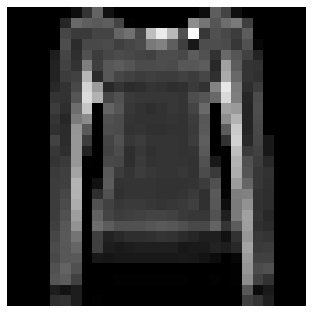

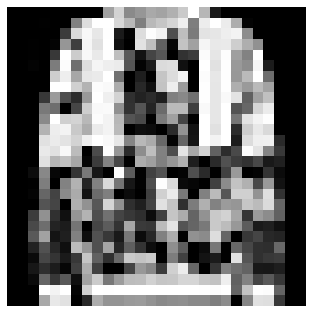

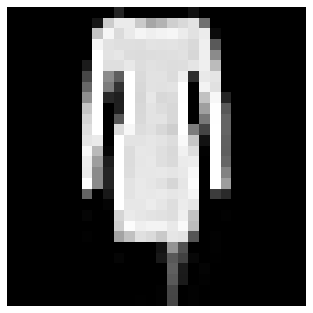

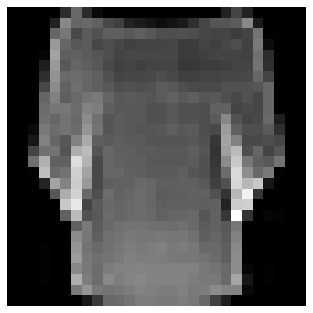

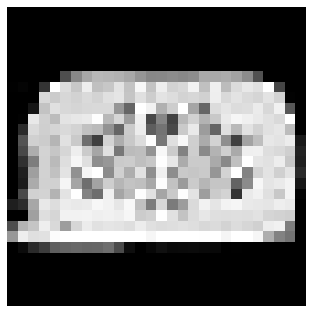

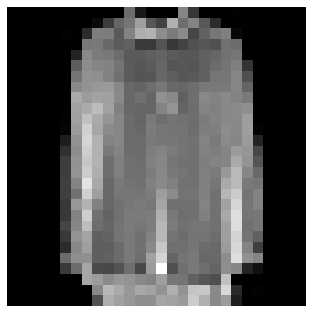

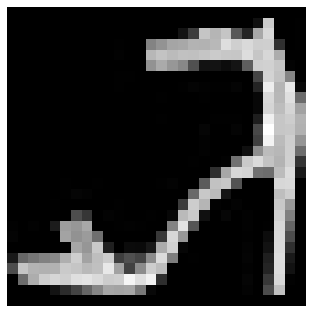

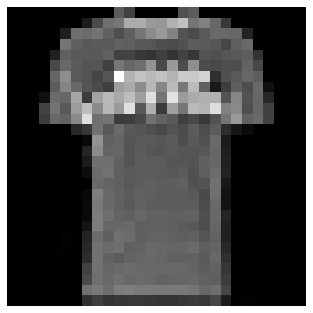

In [35]:
for i in range(10):
    plt.imshow(X_train[i],cmap='gray')
    plt.axis("off")
    plt.show()
    

In [36]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(Convolution2D(8,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [37]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])


In [39]:
hist = model.fit(X_train,y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.2)

Epoch 1/20
32/32 [==============================] - 47s 529ms/step - loss: 2.0335 - accuracy: 0.2434 - val_loss: 0.9884 - val_accuracy: 0.5970
Epoch 2/20
32/32 [==============================] - 16s 491ms/step - loss: 0.9068 - accuracy: 0.6609 - val_loss: 0.7049 - val_accuracy: 0.7390
Epoch 3/20
32/32 [==============================] - 15s 483ms/step - loss: 0.6602 - accuracy: 0.7495 - val_loss: 0.6193 - val_accuracy: 0.7695
Epoch 4/20
32/32 [==============================] - 15s 473ms/step - loss: 0.5946 - accuracy: 0.7715 - val_loss: 0.5864 - val_accuracy: 0.7880
Epoch 5/20
32/32 [==============================] - 15s 483ms/step - loss: 0.5572 - accuracy: 0.7916 - val_loss: 0.5575 - val_accuracy: 0.7985
Epoch 6/20
32/32 [==============================] - 15s 483ms/step - loss: 0.5157 - accuracy: 0.8060 - val_loss: 0.5025 - val_accuracy: 0.8225
Epoch 7/20
32/32 [==============================] - 15s 481ms/step - loss: 0.5082 - accuracy: 0.8124 - val_loss: 0.5220 - val_accuracy: 0.8175

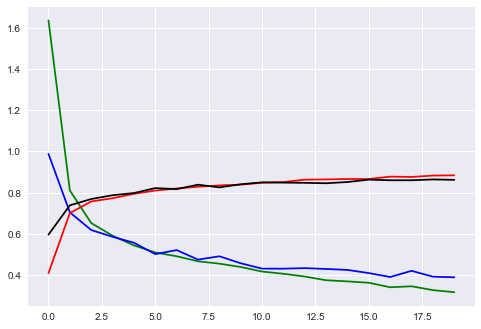

In [42]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()

In [43]:
hist.history

{'loss': [1.635355830192566,
  0.8112041354179382,
  0.653081476688385,
  0.5917919874191284,
  0.5446956753730774,
  0.5103139877319336,
  0.4921512305736542,
  0.46766555309295654,
  0.45619744062423706,
  0.44016510248184204,
  0.4179001748561859,
  0.4072793126106262,
  0.3937510550022125,
  0.37582120299339294,
  0.3703554570674896,
  0.3635885715484619,
  0.34181371331214905,
  0.3465077877044678,
  0.3279706835746765,
  0.3178299367427826],
 'accuracy': [0.4104999899864197,
  0.7013750076293945,
  0.7576249837875366,
  0.7733749747276306,
  0.7946249842643738,
  0.8106250166893005,
  0.8207499980926514,
  0.8291249871253967,
  0.8355000019073486,
  0.8392500281333923,
  0.8482499718666077,
  0.8518750071525574,
  0.8633750081062317,
  0.8646249771118164,
  0.8665000200271606,
  0.8667500019073486,
  0.878125011920929,
  0.8765000104904175,
  0.8832499980926514,
  0.8845000267028809],
 'val_loss': [0.9883654713630676,
  0.7049365043640137,
  0.6193063259124756,
  0.58642238378524